In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("clothes_price_prediction_data.csv")

In [32]:
print("Missing Values:")
print(df.isnull().sum())
df = df.dropna(subset=["Price"])
df = df.dropna()

Missing Values:
Brand       0
Category    0
Color       0
Size        0
Material    0
Price       0
dtype: int64


In [33]:
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["Price"] >= Q1 - 1.5 * IQR) & (df["Price"] <= Q3 + 1.5 * IQR)]

In [34]:
sns.set(style="whitegrid")

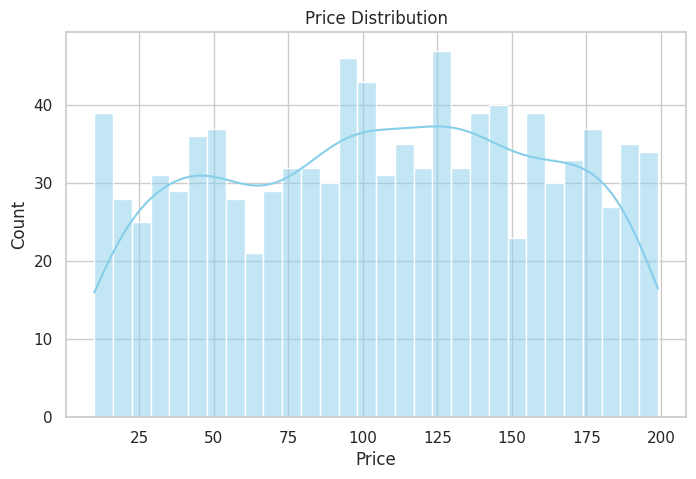

In [35]:
#1. Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], bins=30, kde=True, color='skyblue')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [36]:
#2. Pair Plot for Key Numeric Features (if available)
numeric_cols = ["price", "cost_price", "sales_volume", "usage_in_months"]
numeric_cols = [col for col in numeric_cols if col in df.columns]

if len(numeric_cols) > 1:
    sns.pairplot(df[numeric_cols])
    plt.suptitle("Pairwise Relationships", y=1.02)
    plt.show()


In [37]:
#3. Boxplots for Categorical Features
categorical_cols = ["company", "type", "material", "colour", "size"]

for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=col, y="price", data=df)
        plt.xticks(rotation=45)
        plt.title(f"Price vs {col}")
        plt.show()


In [38]:
df.to_csv("cleaned_clothes_data.csv", index=False)
from google.colab import files
files.download("cleaned_clothes_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Load your base dataset
df = pd.read_csv("cleaned_clothes_data.csv")

# Create Bought_Date (random within last 1–6 years)
today = datetime.today()
df["Bought_Date"] = [
    (today - timedelta(days=random.randint(365, 6 * 365))).strftime('%Y-%m-%d')
    for _ in range(len(df))
]
df["Bought_Date"] = pd.to_datetime(df["Bought_Date"])

# Calculate Age in years
df["Age_in_Years"] = (today - df["Bought_Date"]).dt.days / 365

# Generate Usage_Level (weighted more toward used)
usage_probs = [0.05, 0.1, 0.15, 0.25, 0.25, 0.2]
df["Usage_Level"] = random.choices(range(6), weights=usage_probs, k=len(df))

# Generate Original_Price (random but realistic)
df["Original_Price"] = [round(random.uniform(20, 120), 2) for _ in range(len(df))]

# Apply depreciation model to calculate Resale_Price
alpha = 0.08  # depreciation per usage level
beta = 0.10   # depreciation per year
df["Resale_Price"] = df["Original_Price"] * (1 - alpha * df["Usage_Level"] - beta * df["Age_in_Years"])
df["Resale_Price"] = df["Resale_Price"].apply(lambda x: round(max(x, 1), 2))

# Drop intermediate column
df.drop(columns=["Age_in_Years"], inplace=True)

# Save to new CSV
df.to_csv("clothes_with_resale_price.csv", index=False)
print("✅ Updated CSV saved as clothes_with_resale_price.csv")


✅ Updated CSV saved as clothes_with_resale_price.csv


In [5]:
from google.colab import files
files.download("clothes_with_resale_price.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>